<font face="宋体" color=black size=5>ML 第六组 二手车价格预测</font>

## 100,000 UK Used Car Data set
### Data set Link: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/

<font face="宋体" color=black size=5>1、数据预处理</font>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
base_path = "/Users/user/Desktop/archive/"
brand_names = ['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']

all_cars = []
for brand in brand_names:
    df = pd.read_csv(f"{base_path}{brand}.csv")
    df['brand'] = brand
    if brand == 'hyundi':
        df.rename(columns={'tax(£)': 'tax'}, inplace=True)
    all_cars.append(df)

car = pd.concat(all_cars, ignore_index=True)
car["age"] = 2020 - car["year"]
car = car[car['age'] >= 0]
car.drop(columns=["year"], inplace=True)

In [5]:
car

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,age
0,A1,12500,Manual,15735,Petrol,150,55.4,1.4,audi,3
1,A6,16500,Automatic,36203,Diesel,20,64.2,2.0,audi,4
2,A1,11000,Manual,29946,Petrol,30,55.4,1.4,audi,4
3,A4,16800,Automatic,25952,Diesel,145,67.3,2.0,audi,3
4,A3,17300,Manual,1998,Petrol,145,49.6,1.0,audi,1
...,...,...,...,...,...,...,...,...,...,...
99182,Eos,5990,Manual,74000,Diesel,125,58.9,2.0,vw,8
99183,Fox,1799,Manual,88102,Petrol,145,46.3,1.2,vw,12
99184,Fox,1590,Manual,70000,Petrol,200,42.0,1.4,vw,11
99185,Fox,1250,Manual,82704,Petrol,150,46.3,1.2,vw,14


异常值检测


In [ ]:
plt.figure(figsize=(18,12))                                     #散点图生成

plt.subplot(1, 2, 1)
plt.scatter(x=car['age'], y=car['price'],color='b') ##可以用来观察存在线型的关系
plt.xlabel("age", fontsize=13)
plt.ylabel("price", fontsize=13)

plt.subplot(1, 2, 2)
plt.scatter(x=car['mileage'], y=car['price'],color='b') ##可以用来观察存在线型的关系
plt.xlabel("mileage", fontsize=13)
plt.ylabel("price", fontsize=13)
# plt.show()

#删除离群点
car.drop(car[car['age']>40].index,inplace=True)                      #两离群点
car.drop(car[(car['age']>5)&(car['price']>120000)].index,inplace=True) #两离群点
car.drop(car[(car['age']>0)&(car['price']>141000)].index,inplace=True) #四离群点
car.drop(car[(car['age']>20)&(car['price']>19000)].index,inplace=True) #一离群点
car.drop(car[(car['age']>10)&(car['price']>35000)].index,inplace=True) #两离群点
car.drop(car[(car['price']>90000)&(car['mileage']>25000)].index,inplace=True) #3离群点
car.drop(car[car['mileage']>200000].index,inplace=True) #9离群点

<font face="宋体" color=black size=5>2、特征工程</font>

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression

In [7]:
# 分离目标变量和特征
X = car.drop('price', axis=1)
y = car['price']

# 对定类变量进行独热编码，对数值型变量进行标准化
cat_columns = ['model', 'transmission', 'fuelType', 'brand']  # 定类变量
num_columns = X.select_dtypes(include=['int64', 'float64']).columns  # 数值型变量

In [8]:
# ColumnTransformer是列转换器，是scikit-learn库的一个工具，用于对数据集中不同列应用不同的预处理
# 创建列转换器，对分类特征应用独热编码，对数值型特征应用标准化
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),# handle_unknown='ignore'：如果遇到未知的类别，忽略
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough' # remainder='passthrough'：在转换器列表中未明确指定的所有列将在转换过程中保持不变
)
# 应用转换
X_transformed = column_transformer.fit_transform(X)

In [9]:
# 特征选择
# 结合SelectKBest与f_regression选择对目标变量price影响最大的特征，选择所有特征
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X_transformed, y)

In [10]:
# 获取选中的特征名称
selected_feature_names = column_transformer.get_feature_names_out()[selector.get_support()]

# 如果X_selected是稀疏矩阵，转换为密集格式
if hasattr(X_selected, "toarray"):
    X_selected = X_selected.toarray()

In [11]:
# 创建DataFrame，包含选定的特征
car_with_label_selected_dense = pd.DataFrame(X_selected, columns=selected_feature_names)

In [12]:
car_with_label_selected_dense

,cat__model_ 1 Series,cat__model_ 2 Series,cat__model_ 3 Series,cat__model_ 4 Series,cat__model_ 5 Series,cat__model_ 6 Series,cat__model_ 7 Series,cat__model_ 8 Series,cat__model_ A Class,cat__model_ A1,cat__model_ A2,cat__model_ A3,cat__model_ A4,cat__model_ A5,cat__model_ A6,cat__model_ A7,cat__model_ A8,cat__model_ Accent,cat__model_ Adam,cat__model_ Agila,cat__model_ Amarok,cat__model_ Amica,cat__model_ Ampera,cat__model_ Antara,cat__model_ Arteon,cat__model_ Astra,cat__model_ Auris,cat__model_ Avensis,cat__model_ Aygo,cat__model_ B Class,cat__model_ B-MAX,cat__model_ Beetle,cat__model_ C Class,cat__model_ C-HR,cat__model_ C-MAX,cat__model_ CC,cat__model_ CL Class,cat__model_ CLA Class,cat__model_ CLC Class,cat__model_ CLK,cat__model_ CLS Class,cat__model_ Caddy,cat__model_ Caddy Life,cat__model_ Caddy Maxi,cat__model_ Caddy Maxi Life,cat__model_ California,cat__model_ Camry,cat__model_ Caravelle,cat__model_ Cascada,cat__model_ Citigo,cat__model_ Combo Life,cat__model_ Corolla,cat__model_ Corsa,cat__model_ Crossland X,cat__model_ E Class,cat__model_ EcoSport,cat__model_ Edge,cat__model_ Eos,cat__model_ Escort,cat__model_ Fabia,cat__model_ Fiesta,cat__model_ Focus,cat__model_ Fox,cat__model_ Fusion,cat__model_ G Class,cat__model_ GL Class,cat__model_ GLA Class,cat__model_ GLB Class,cat__model_ GLC Class,cat__model_ GLE Class,cat__model_ GLS Class,cat__model_ GT86,cat__model_ GTC,cat__model_ Galaxy,cat__model_ Getz,cat__model_ Golf,cat__model_ Golf SV,cat__model_ Grand C-MAX,cat__model_ Grand Tourneo Connect,cat__model_ Grandland X,cat__model_ Hilux,cat__model_ I10,cat__model_ I20,cat__model_ I30,cat__model_ I40,cat__model_ I800,cat__model_ IQ,cat__model_ IX20,cat__model_ IX35,cat__model_ Insignia,cat__model_ Ioniq,cat__model_ Jetta,cat__model_ KA,cat__model_ Ka+,cat__model_ Kadjar,cat__model_ Kamiq,cat__model_ Karoq,cat__model_ Kodiaq,cat__model_ Kona,cat__model_ Kuga,cat__model_ Land Cruiser,cat__model_ M Class,cat__model_ M2,cat__model_ M3,cat__model_ M4,cat__model_ M5,cat__model_ M6,cat__model_ Meriva,cat__model_ Mokka,cat__model_ Mokka X,cat__model_ Mondeo,cat__model_ Mustang,cat__model_ Octavia,cat__model_ PROACE VERSO,cat__model_ Passat,cat__model_ Polo,cat__model_ Prius,cat__model_ Puma,cat__model_ Q2,cat__model_ Q3,cat__model_ Q5,cat__model_ Q7,cat__model_ Q8,cat__model_ R Class,cat__model_ R8,cat__model_ RAV4,cat__model_ RS3,cat__model_ RS4,cat__model_ RS5,cat__model_ RS6,cat__model_ RS7,cat__model_ Ranger,cat__model_ Rapid,cat__model_ Roomster,cat__model_ S Class,cat__model_ S-MAX,cat__model_ S3,cat__model_ S4,cat__model_ S5,cat__model_ S8,cat__model_ SL CLASS,cat__model_ SLK,cat__model_ SQ5,cat__model_ SQ7,cat__model_ Santa Fe,cat__model_ Scala,cat__model_ Scirocco,cat__model_ Sharan,cat__model_ Shuttle,cat__model_ Streetka,cat__model_ Superb,cat__model_ Supra,cat__model_ T-Cross,cat__model_ T-Roc,cat__model_ TT,cat__model_ Terracan,cat__model_ Tigra,cat__model_ Tiguan,cat__model_ Tiguan Allspace,cat__model_ Touareg,cat__model_ Touran,cat__model_ Tourneo Connect,cat__model_ Tourneo Custom,cat__model_ Transit Tourneo,cat__model_ Tucson,cat__model_ Up,cat__model_ Urban Cruiser,cat__model_ V Class,cat__model_ Vectra,cat__model_ Veloster,cat__model_ Verso,cat__model_ Verso-S,cat__model_ Viva,cat__model_ Vivaro,cat__model_ X-CLASS,cat__model_ X1,cat__model_ X2,cat__model_ X3,cat__model_ X4,cat__model_ X5,cat__model_ X6,cat__model_ X7,cat__model_ Yaris,cat__model_ Yeti,cat__model_ Yeti Outdoor,cat__model_ Z3,cat__model_ Z4,cat__model_ Zafira,cat__model_ Zafira Tourer,cat__model_ i3,cat__model_ i8,cat__model_180,cat__model_200,cat__model_220,cat__model_230,cat__transmission_Automatic,cat__transmission_Manual,cat__transmission_Other,cat__transmission_Semi-Auto,cat__fuelType_Diesel,cat__fuelType_Electric,cat__fuelType_Hybrid,cat__fuelType_Other,cat__fuelType_Petrol,cat__brand_audi,cat__brand_bmw,cat__brand_ford,cat__brand_hyundi,cat__brand_merc,cat__brand_skoda,cat__brand_toyota,cat__brand_vauxhall,cat__brand_vw,num__mil

In [37]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

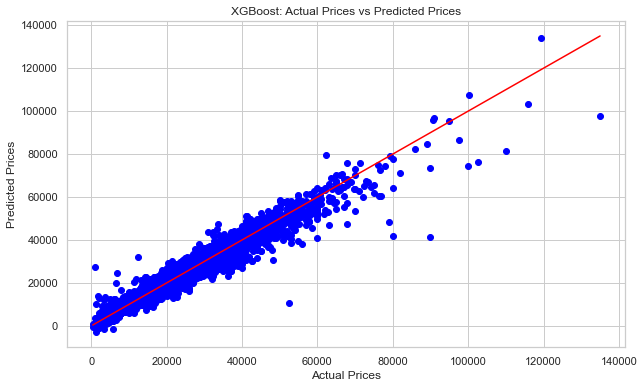

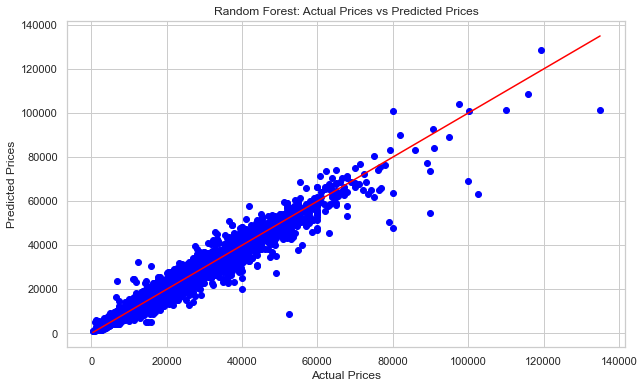

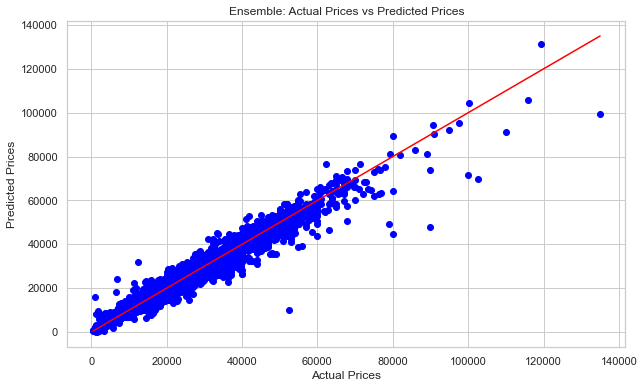

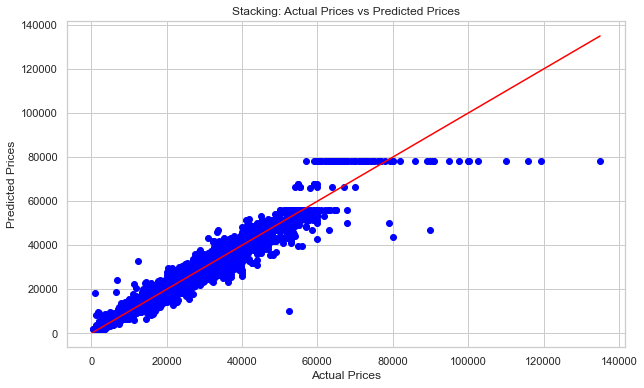

In [38]:
# 划分测试集与训练集
X = car_with_label_selected_dense
y = car_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.3, max_depth=10, n_estimators=50, alpha=10)
xgb_reg.fit(X_train, y_train)  # 训练模型
y_pred_xgb = xgb_reg.predict(X_test)  # 预测价格

# 评价 XGBoost 模型
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 画图观察 XGBoost 预测效果
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.title('XGBoost: Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# 随机森林
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)  # 训练模型
y_pred_rf = rf_reg.predict(X_test)  # 预测价格

# 评估随机森林模型
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# 画图观察随机森林预测效果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.title('Random Forest: Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# 集成学习
y_pred_ensemble = (y_pred_xgb + y_pred_rf) / 2

# 评估集成模型的性能
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# 画图观察集成模型的预测效果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensemble, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.title('Ensemble: Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Stacking 集成学习
models = [
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.3, max_depth=10, n_estimators=50, alpha=10)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]
stacked_reg = StackingRegressor(estimators=models, final_estimator=xgb_reg)
stacked_reg.fit(X_train, y_train)  # 训练模型
y_pred_stacked = stacked_reg.predict(X_test)  # 预测

# 模型评估
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
rmse_stacked = mean_squared_error(y_test, y_pred_stacked, squared=False)
r2_stacked = r2_score(y_test, y_pred_stacked)

# 画图观察集成模型的预测效果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stacked, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.title('Stacking: Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# 模型评估对比
performance_metrics = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'Ensemble', 'Stacking'],
    'MSE': [mse_xgb, mse_rf, mse_ensemble, mse_stacked],
    'RMSE': [rmse_xgb, rmse_rf, rmse_ensemble, rmse_stacked],
    'R^2': [r2_xgb, r2_rf, r2_ensemble, r2_stacked]
})


In [39]:
performance_metrics

,Model,MSE,RMSE,R^2
0,XGBoost,4.167874e+06,2041.537060,0.956332
1,Random Forest,3.549148e+06,1883.918373,0.962815
2,Ensemble,3.322231e+06,1822.698700,0.965192
3,Stacking,4.080756e+06,2020.088074,0.957245


In [ ]:
<font face="宋体" color=black size=5>ML 第六组 二手车价格预测</font>

## 100,000 UK Used Car Data set
### Data set Link: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/

<font face="宋体" color=black size=5>1、数据预处理</font>

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

base_path = "/Users/user/Desktop/archive/"
brand_names = ['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']

all_cars = []
for brand in brand_names:
    df = pd.read_csv(f"{base_path}{brand}.csv")
    df['brand'] = brand
    if brand == 'hyundi':
        df.rename(columns={'tax(£)': 'tax'}, inplace=True)
    all_cars.append(df)

car = pd.concat(all_cars, ignore_index=True)
car["age"] = 2020 - car["year"]
car = car[car['age'] >= 0]
car.drop(columns=["year"], inplace=True)

car

<font face="宋体" color=black size=5>2、特征工程</font>

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression

# 分离目标变量和特征
X = car.drop('price', axis=1)
y = car['price']

# 对定类变量进行独热编码，对数值型变量进行标准化
cat_columns = ['model', 'transmission', 'fuelType', 'brand']  # 定类变量
num_columns = X.select_dtypes(include=['int64', 'float64']).columns  # 数值型变量

# ColumnTransformer是列转换器，是scikit-learn库的一个工具，用于对数据集中不同列应用不同的预处理
# 创建列转换器，对分类特征应用独热编码，对数值型特征应用标准化
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),# handle_unknown='ignore'：如果遇到未知的类别，忽略
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough' # remainder='passthrough'：在转换器列表中未明确指定的所有列将在转换过程中保持不变
)
# 应用转换
X_transformed = column_transformer.fit_transform(X)

# 特征选择
# 结合SelectKBest与f_regression选择对目标变量price影响最大的特征，选择所有特征
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X_transformed, y)

# 获取选中的特征名称
selected_feature_names = column_transformer.get_feature_names_out()[selector.get_support()]

# 如果X_selected是稀疏矩阵，转换为密集格式
if hasattr(X_selected, "toarray"):
    X_selected = X_selected.toarray()

# 创建DataFrame，包含选定的特征
car_with_label_selected_dense = pd.DataFrame(X_selected, columns=selected_feature_names)

car_with_label_selected_dense

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 划分测试集与训练集
X = car_with_label_selected_dense
y = car_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.3, max_depth=10, n_estimators=50, alpha=10)
xgb_reg.fit(X_train, y_train)  # 训练模型
y_pred_xgb = xgb_reg.predict(X_test)  # 预测价格

# 评价 XGBoost 模型
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 画图观察 XGBoost 预测效果
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.title('XGBoost: Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# 随机森林
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)  # 训练模型
y_pred_rf = rf_reg.predict(X_test)  # 预测价格

# 评估随机森林模型
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# 画图观察随机森林预测效果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.title('Random Forest: Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# 集成学习
y_pred_ensemble = (y_pred_xgb + y_pred_rf) / 2

# 评估集成模型的性能
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# 画图观察集成模型的预测效果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensemble, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.title('Ensemble: Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Stacking 集成学习
models = [
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.3, max_depth=10, n_estimators=50, alpha=10)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]
stacked_reg = StackingRegressor(estimators=models, final_estimator=xgb_reg)
stacked_reg.fit(X_train, y_train)  # 训练模型
y_pred_stacked = stacked_reg.predict(X_test)  # 预测

# 模型评估
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
rmse_stacked = mean_squared_error(y_test, y_pred_stacked, squared=False)
r2_stacked = r2_score(y_test, y_pred_stacked)

# 画图观察集成模型的预测效果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stacked, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.title('Stacking: Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# 模型评估对比
performance_metrics = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'Ensemble', 'Stacking'],
    'MSE': [mse_xgb, mse_rf, mse_ensemble, mse_stacked],
    'RMSE': [rmse_xgb, rmse_rf, rmse_ensemble, rmse_stacked],
    'R^2': [r2_xgb, r2_rf, r2_ensemble, r2_stacked]
})


performance_metrics